# Introducción a Pandas

Pandas es un módulo para trabajar con datos tabulares, o datos que tienen filas y columnas.
Algunos de estos son: hojas de calculo, tablas de bases de datos, archivos csv, etc. Tiene caracteristicas de NumPy u Matplotlib

Pandas ofrece:
- Cargar datos tabulares de diferentes fuentes.
- Buscar/Filtrar sobre filas o columnas en particular.
- Hacer calculos estadisticos.
- Combinar datos de diferentes fuentes de datos.

![alt](images/dato_tabular_rectangular.png)

Estructuras de Panda:

- **DataFrame** : Permitír representar los datos tabulares. Es una serie de Series de pandas indexados por un valor.
- **Series** : Es un ndarray de 1 dimensión con una etiqueta

> R también tiene DataFrames, mientras que SQL tiene tablas en sus BD

## Cargando Pandas


```python

import pandas as pd
```

In [ ]:
import pandas as pd

### Creando el primer DataFrame

$$f(x) = x^2 $$
```python
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
datos = [[v, v**2] for v in x]

df = pd.DataFrame(datos)
```

```python
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [v**2 for v in x]

df = pd.DataFrame({
    'x': x,
    'y': y
})
```

In [ ]:
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
datos = [[v, v**2] for v in x]

indices = ["f({})".format(v) for v in x]

df_ejemplo = pd.DataFrame(datos, index=indices)


df_ejemplo

In [ ]:
y = [v**2 for v in x]

df_ejemplo2 = pd.DataFrame({
    'x': x,
    'y': y
}, index=indices)

df_ejemplo2

## Cargando un archivo CSV a un DataFrame

```python

df = pd.read_csv('archivo.csv')
```

In [ ]:
df_temperatures = pd.read_csv('DATASETS/temperatures.csv')
df_ventas = pd.read_pickle('DATASETS/walmart_sales.pkl.bz2')
type(df_temperatures)

## Inspeccionando un DataFrame

```python


print(df)
```

In [ ]:
df_temperatures

In [ ]:
print(df_ventas)

#### Uso de Head & Tail

- **head()** : Regresara por default las primeras 5 filas del DataFrame, también podemos indicar el número de filas que deseamos mostrar, pasando como argumento el número.
- **tail()** : Regresara por default las ultimas 5 filas del DataFrame, también podemos indicar el número de filas que deseamos mostrar, pasando como argumento el número.


In [ ]:
df_ventas.head()

In [ ]:
df_ventas.head(10)

In [ ]:
df_ventas.tail()

In [ ]:
df_ventas.tail(7)

#### Obteniendo más información del DataFrame

- **info()**: Regresara información de las columnas, el número de filas y los tipos de datos de cada columna. Tambien el total de datos que contiene el DataFrame, esto nos sirve para identificar si faltan valores en alguna de las variables/columnas.
- **shape**: Regresara el número de filas y columnas de nuestro DataFrame. (n, m), donde n son las filas y m el número de columnas.
- **describe()**: Calcula algunas estadisticas de resumen para las columnas númericas, como la media, la mediana, desviación estandar, etc.
- **values**: Regresa el DF como una matrix bidimensional de NumPy que contendra solo los valores.
- **index**: Contiene números de fila o nombres de fila
- **dtypes**: Retorna el listado de columnas y el tipo que tienen
- **columns**: Retorna una lista con los nombres de columnas del DataFrame.

In [ ]:
df_ventas.info()

In [ ]:
df_ventas.shape

In [ ]:
df_ventas.dtypes

In [ ]:
df_ventas.columns

In [ ]:
df_ventas.index

## Seleccionando Columnas del DF

Pandas nos permite obtener valores de una columna en especifico. Imaginemos que necesitamos realizar la suma de una columna

Para seleccionar una columna tenemos 2 maneras de hacerlo. La primera consiste en poner entre corchetes (`[]`) el nombre de nuestra columna entre comillas. Por ejemplo

```python
ventas_semanales = df["weekly_sales"]
```

También podemos usar la notación de puntos, es decir, despues de nuestra variable ponemos punto y el nombre de nuestra columna. Por ejemplo

```python
ventas_semanales = df.weekly_sales
```

Hay que añadir que la notación punto sirve cuando el nombre de la columna **no contiene espacios** ni **caracteres especiales**. Por ejemplo

```python
df_reportes["¿Es Nuevo?"] # Correcto


df_reportes.¿Es Nuevo?    # Incorrecto
```

El resultado de seleccionar la columna se le conoce como **Serie**, que es otra estructura de datos de pandas.

```python
type(ventas_semanales) # pandas.core.series.Series
```

In [ ]:
ventas_semanales = df_ventas["weekly_sales"]
type(ventas_semanales)

### Seleccionando multiple columnas

Para seleccionar varias columnas, debemos pasar una lista de las columnas a seleccionar, y esto lo colocaremos dentro de los corchetes ([]). De esta manera crearemos un subconjunto del DataFrame

```python

sub_df = df[['department', 'weekly_sales']]
subdf
```

In [ ]:
sub_df = df_ventas[['department', 'weekly_sales']]
sub_df

In [ ]:
type(sub_df)

### Seleccionado con loc & iloc

**loc** nos va a servir para seleccionar en base al nombre del indice del DataFrame. También permite seleccionar en base al nombre de la columna o columnas.

```python
df.loc[:, 'col':'col_n']
```

**iloc** selecciona en base al número de fila o columna

```python
df.iloc[:, 0:3]
```

In [ ]:
print(df_ventas.columns)
print(df_ventas.index)

df_ventas.loc[0:6, 'store':'is_holiday']

In [ ]:
df_ventas.iloc[0:6, 0:6]

## Filtrando datos

Para realizar un filtrado, debemos recordar las operaciones logicas y los operadores de comparación. También recordar la matriz booleana que vimos en NumPy. Filtrar datos puede aplicarse a todo el DataFrame y a una o más columnas. Por ejemplo

```python
filtro = df.columna_n > 12
df[filtro]

filtro1 = df.columna_n > 12
filtro2 = df.columna_n2 == 'X'
df[filtro1 & filtro2]
df[filtro1 | filtro2]
df[(df.columna_n > 12) & (df.columna_n == 'X')]

filtro3 = df.columna_n.isin(['valor_1', 'valor_2'])
df[filtro3]
```

In [ ]:
print(df_temperatures.city.unique())

df_temperatures.city == 'Tokyo'

In [ ]:
filtro_tokyo = df_temperatures.city == 'Tokyo'
df_temperatures[filtro_tokyo]

In [ ]:
filtro_mx = df_temperatures.country == 'Mexico'
df_temperatures[filtro_tokyo | filtro_mx]

In [ ]:
sub_df_temp = df_temperatures[(df_temperatures.country == 'Mexico') | (df_temperatures.country == 'China')]

sub_df_temp

## Ordenando

Para ordenar los datos de un DataFrame, podemos usar el metodo **sort_values()**, el cuál recibe la variable o columna por la cuál deseamos ordenar. También recibe como parametro el tipo de ordenamiento, esto se hace pasando como argumento la llave `ascending` que recíbe como valor `True` o `False`. Por default viene configurado de manera ascendente.

```python
df.sort_values('columna_n')
df.sort_values('columna_n', ascending=False)
```

Si deseamos ordenar por más de una columna/variable, debemos pasar una lista con los valores de las columnas a ordenar, esto también aplicara al tipo de ordenamiento, que ahora recíbira una lista de valores booleanos en base a la posición de nuestras columnas.

```python
df.sort_values(['columna_1', 'columna_2'])
df.sort_values(['columna_1', 'columna_2'], ascending=[True, False])
```

In [ ]:
df_ventas.sort_values('store')

In [ ]:
df_ventas.sort_values(['store', 'department'], ascending=[True, False])

In [ ]:
df_ventas.sort_values(['store', 'department'], ascending=[False, True])

## Indices

Cuando cargamos un DataFrame, pandas de manera automatica creara un indice, sin embargo, en algunas ocasiones sera necesario cambiarlo, por ejemplo en las series de tiempo. Para cambiar un indice, usaremos el método `set_index`, para regresar nuestros indices a la normalidad, usaremos `reset_index`. Para ordenar nuestros indices, usaremos el método `sort_index`

In [ ]:
df_temperatures

In [ ]:
df_ind = df_temperatures.set_index('city') # Cambiamos el indice en base a los valores de la columna
df_ind

### loc & iloc

**loc** nos va a servir para seleccionar en base al nombre del indice del DataFrame. También permite seleccionar en base al nombre de la columna o columnas.

**iloc** selecciona en base al número de fila o columna

#### Ejemplo loc

In [ ]:
df_temperatures[df_temperatures.city.isin(['Tokyo', 'Xian'])]

In [ ]:
df_ind.loc[['Tokyo', 'Xian']]

#### Multiples indices (indices multinivel o jerarquicos) y Ejemplo

In [ ]:
df_ind2 = df_temperatures.set_index(['country', 'city'])
df_ind2

In [ ]:
df_ind2.loc[['Mexico', 'India']]

In [ ]:
df_temperatures[df_temperatures['country'] == 'Japan'].city.unique()

In [ ]:
df_temperatures[df_temperatures['country'] == 'India'].city.unique()

In [ ]:
df_ind2.loc[[('India', 'Bombay'), ('Japan', 'Nagoya')]]

## Creando nuevas columnas

Muchas veces habra que crear nuevas columnas derivadas de columnas existentes. Por ejemplo

```python
df['col_nueva'] = df.col_1 * 3

df
```

In [ ]:
data = {'x': range(1, 6), 'x^2': [x**2 for x in range(1, 6)]}
dt_custom = pd.DataFrame(data)
dt_custom

In [ ]:
dt_custom['x^3'] = dt_custom.x**3 # pow(dt_custom, 3)
dt_custom 

## Aplicando funciones de agregación

Cuando queremos aplicar una función o agregación que no se encuentre incluida, podemos usar el método **agg()**, por ejemplo para calcular el percentila 30, podemos crear una función llamada pct30 que tiene como parametro la columna y luego aplica el calculo.

```python
def pct30(column):
    return column.quantile(0.3)
```

Ahora podemos seleccionar una columna o crear un subconjunto, y usar el metodo `agg`, y pasarle el nombre de nuestra función. Por ejemplo

```python
df.columna_n.agg(pct30)

df[['col1', 'col2']].agg(pct30)
```

También podemos aplicar más de una agregación, y esto lo hacemos pasando una lista con el nombre de las funciones a aplicar. Por ejemplo

```python
def pct40(column):
    return column.quantile(0.4)

df.columna_n.agg([pct30, pct40])

df[['col1', 'col2']].agg([pct30, pct40])
```

In [ ]:
# Media, Suma, Desv Estandar
round(df_ventas.weekly_sales.mean(), 2)

In [ ]:
# Aplicando Inter Cuartile
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)

# Aplicando la agregación
df_ventas.temperature_c.agg(iqr)

In [ ]:
import numpy as np

df_ventas[['temperature_c', 'fuel_price_usd_per_l', 'unemployment']].agg([iqr, np.median])

## Contando valores

Para contar los valores de una columna, podemos usar el método `value_counts()`
- df.col.value_counts()
- df.col.value_counts(sort=True) # Ordena
- df.col.value_counts(normalize=True) # Recuenta los datos en base a su proporción
- df.drop_duplicates(subset='col')

In [ ]:
df_temperatures.country.value_counts()

In [ ]:
df_temperatures.country.value_counts(normalize=True)

## Agrupando

```python
df.groupby('columna_n')

df.groupby(['columna_1',..., 'columna_n'])
```

In [ ]:
df_temperatures.groupby('country').city.count()

## Tablas dínamicas ( Pivot Tables )

Las tablas dinamicas son otra forma de calcular estadisticas de resumen agrupadas. Si alguna vez han usado hojas de calculo, seguramente estan familiarizados con las tablas dinamicas. Para crar una tabla dinamica, usaremos el método **pivot_table**, el cúal recibe como parametros `values` e `index`. `values` es la columna que deseamos resumir, mientras que `index` es la columna por la que deseamos agrupar. Por default `pivot_table` toma la media de cada grupo, por lo que si queremos una estadistica diferente, debemos pasarle el argumento `aggfunc`, que recibe el nombre de nuestra función, al igual que `agg`, podemos pasarle una lista de funciones que deseamos aplicar.

#### Pivot Tables de 2 columnas

Cuando agrupabamos, lo haciamos pasando una lista de columnas. Con Pivot Table, lo hacemos pasando el argumento `columns` y pasandole el nombre de la columna.

```python
pd.pivot_table(df, values="columna", index="columna_a_agrupar", columns="otra_columna_a_agrupar")
df.pivot_table(values="columna", index="columna_a_agrupar")

```

In [82]:
pd.pivot_table(df_ventas, values='weekly_sales', index='type')

,weekly_sales
type,
A,20099.568043
B,12335.331875
C,9519.532538


In [83]:
df_ventas.pivot_table(values='weekly_sales', index='type')

,weekly_sales
type,
A,20099.568043
B,12335.331875
C,9519.532538


In [84]:
df_ventas.pivot_table(values='weekly_sales', index='type', aggfunc=[np.mean, np.median])

,mean,median
,weekly_sales,weekly_sales
type,,
A,20099.568043,10105.17
B,12335.331875,6269.02
C,9519.532538,1149.67


In [85]:
df_ventas.pivot_table(values='weekly_sales', index='type', columns="is_holiday")

is_holiday,False,True
type,,
A,20008.746759,21297.517824
B,12248.741339,13478.844240
C,9518.528116,9532.963131


Si observabamos, veremos valores faltantes con `NaN` o `null`, esto es porque no existen esos valores para ese grupo. Para evitar ver `NaN` o `null`, podemos aplicar el parametro `fill_value` e indicarle que llene esos valores faltantes por uno que le definamos, en este caso, queremos que todos los faltantes sean `0`

```python
pd.pivot_table(..., fill_value=0)
df.pivot_table(..., fill_value=0)
```

Otro parametro que nos puede ser util es `margins` que recibe `True` o `False`, esto hara que la última fila y columna de la tabla dínamica contengan la media de todos los valores, sin incluir los valores que se completaron con `0`. Esto nos permite ver un resumen estadistico para los multiples niveles del conjunto de datos agrupado por las variables

In [86]:
df_ventas.pivot_table(values='weekly_sales', index='department', columns="type", fill_value=0, margins=True)

type,A,B,C,All
department,,,,
1,22956.887886,17990.876158,8951.733462,19213.485088
2,51994.674873,43051.996919,14424.851713,43607.020113
3,13881.033137,12965.414311,820.276818,11793.698516
4,32973.814075,21259.895804,13669.370396,25974.630238
5,26803.448045,21184.602916,767.600774,21365.583515
...,...,...,...,...
96,19900.943552,4752.674874,15766.025431,15217.211505
97,22093.807101,3543.243304,13419.542809,14437.120839
98,10979.816195,299.951644,5479.758054,6973.013875


## Visualizando

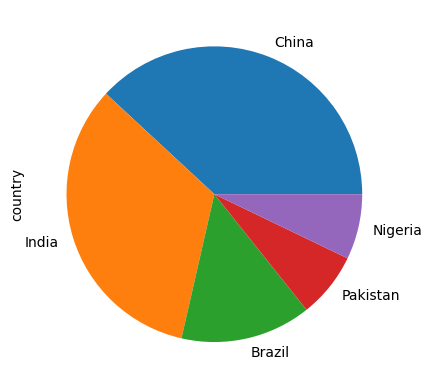

In [89]:
import matplotlib.pyplot as plt

df_temperatures.country.value_counts(normalize=True).head(5).plot(kind="pie")
plt.show()

## Guardando un DataFrame a un archivo CSV

```python
df.to_csv('nombre_archivo.csv')
```

In [90]:
df_ejemplo2.to_csv("DATASETS/fx.csv")